# Projet 7 : Loan Default Prediction


Lien Kaggle : https://www.kaggle.com/datasets/nikhil1e9/loan-default


About data
This dataset has been taken from Coursera's Loan Default Prediction Challenge.The dataset contains 255,347 rows and 18 columns in total.Our objective is to predict the risk of payment default using machine learning models.

Authors : 
BENLARBI Ilias, 
SANOGO Fanta, 
ATJI Cheick, 
WABO Robin


In [ ]:
# pip install xgboost
# pip install imblearn
# pip install ydata_profiling
# pip install shap


## Partie 1 : Analyse exploratoire des données 

### Importation des librairies

Commande pour installer les librairies : 

- exécuter dans la cellule:  %pip install -r requirements.txt  

ou  

- exécuter dans le terminal (prompt ou powershell):  pip install -r requirements.txt

In [ ]:
import pickle as pkl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import math 
import shap

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_squared_error
from ydata_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder

### Importation des données

In [34]:
loan_data = pd.read_csv('Loan_default.csv')
loan_data

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


In [35]:
# Dimmensions des données
shape=loan_data.shape
print(f"Taille des données: {shape[0]:.2f} lignes\nNombre de variables: {shape[1]}")

loan_data.head(5)

Taille des données: 255347.00 lignes
Nombre de variables: 18


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [36]:
# Description type de variables
dictionnaire = {
    'LoanID': 'Identifiant unique pour chaque prêt',
    'Age': 'Âge de l’emprunteur',
    'Income': 'Revenu annuel de l’emprunteur',
    'LoanAmount': 'Montant emprunté',
    'CreditScore': 'Score de crédit de l’emprunteur indiquant sa solvabilité',
    'MonthsEmployed': 'Nombre de mois d’emploi de l’emprunteur',
    'NumCreditLines': 'Nombre de lignes de crédit ouvertes par l’emprunteur',
    'InterestRate': 'Taux d’intérêt du prêt',
    'LoanTerm': 'Durée du prêt en mois',
    'DTIRatio': 'Ratio dette/revenu indiquant le niveau d’endettement de l’emprunteur',
    'Education': 'Niveau d’éducation le plus élevé atteint (PhD, Master, Licence, Lycée)',
    'EmploymentType': 'Type de statut d’emploi (Temps plein, Temps partiel, Indépendant, Sans emploi)',
    'MaritalStatus': 'Statut matrimonial de l’emprunteur (Célibataire, Marié, Divorcé)',
    'HasMortgage': 'Indique si l’emprunteur a un prêt hypothécaire (Oui ou Non)',
    'HasDependents': 'Indique si l’emprunteur a des personnes à charge (Oui ou Non)',
    'LoanPurpose': 'But du prêt (Maison, Auto, Éducation, Affaires, Autre)',
    'HasCoSigner': 'Indique si le prêt a un co-emprunteur (Oui ou Non)',
    'Default': 'Variable cible indiquant si le prêt est en défaut (1) ou non (0)'
}


def info(data):

    Information = pd.DataFrame({
        'Variables': data.columns,
        'Type': data.dtypes,
        'Unique_values': data.nunique(),
        'NA_counts': data.isna().sum(),
        'NA_percent%':data.isna().mean().round(4)*100,
        }).reset_index(drop=True)

    Information['Description_des_variables'] = Information['Variables'].map(dictionnaire)
    
    return Information

# Application sur loan_data
datainfo = info(loan_data)
datainfo

,Variables,Type,Unique_values,NA_counts,NA_percent%,Description_des_variables
0,LoanID,object,255347,0,0.0,Identifiant unique pour chaque prêt
1,Age,int64,52,0,0.0,Âge de l’emprunteur
2,Income,int64,114620,0,0.0,Revenu annuel de l’emprunteur
3,LoanAmount,int64,158729,0,0.0,Montant emprunté
4,CreditScore,int64,550,0,0.0,Score de crédit de l’emprunteur indiquant sa s...
5,MonthsEmployed,int64,120,0,0.0,Nombre de mois d’emploi de l’emprunteur
6,NumCreditLines,int64,4,0,0.0,Nombre de lignes de crédit ouvertes par l’empr...
7,InterestRate,float64,2301,0,0.0,Taux d’intérêt du prêt
8,LoanTerm,int64,5,0,0.0,Durée du prêt en mois
9,DTIRatio,float64,81,0,0.0,Ratio dette/revenu indiquant le niveau d’endet...


In [37]:
# Vérification des doublons
datainfo.duplicated().sum()

0

In [38]:
# Statistiques descriptives
loan_data.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


### Répartition des variables continues

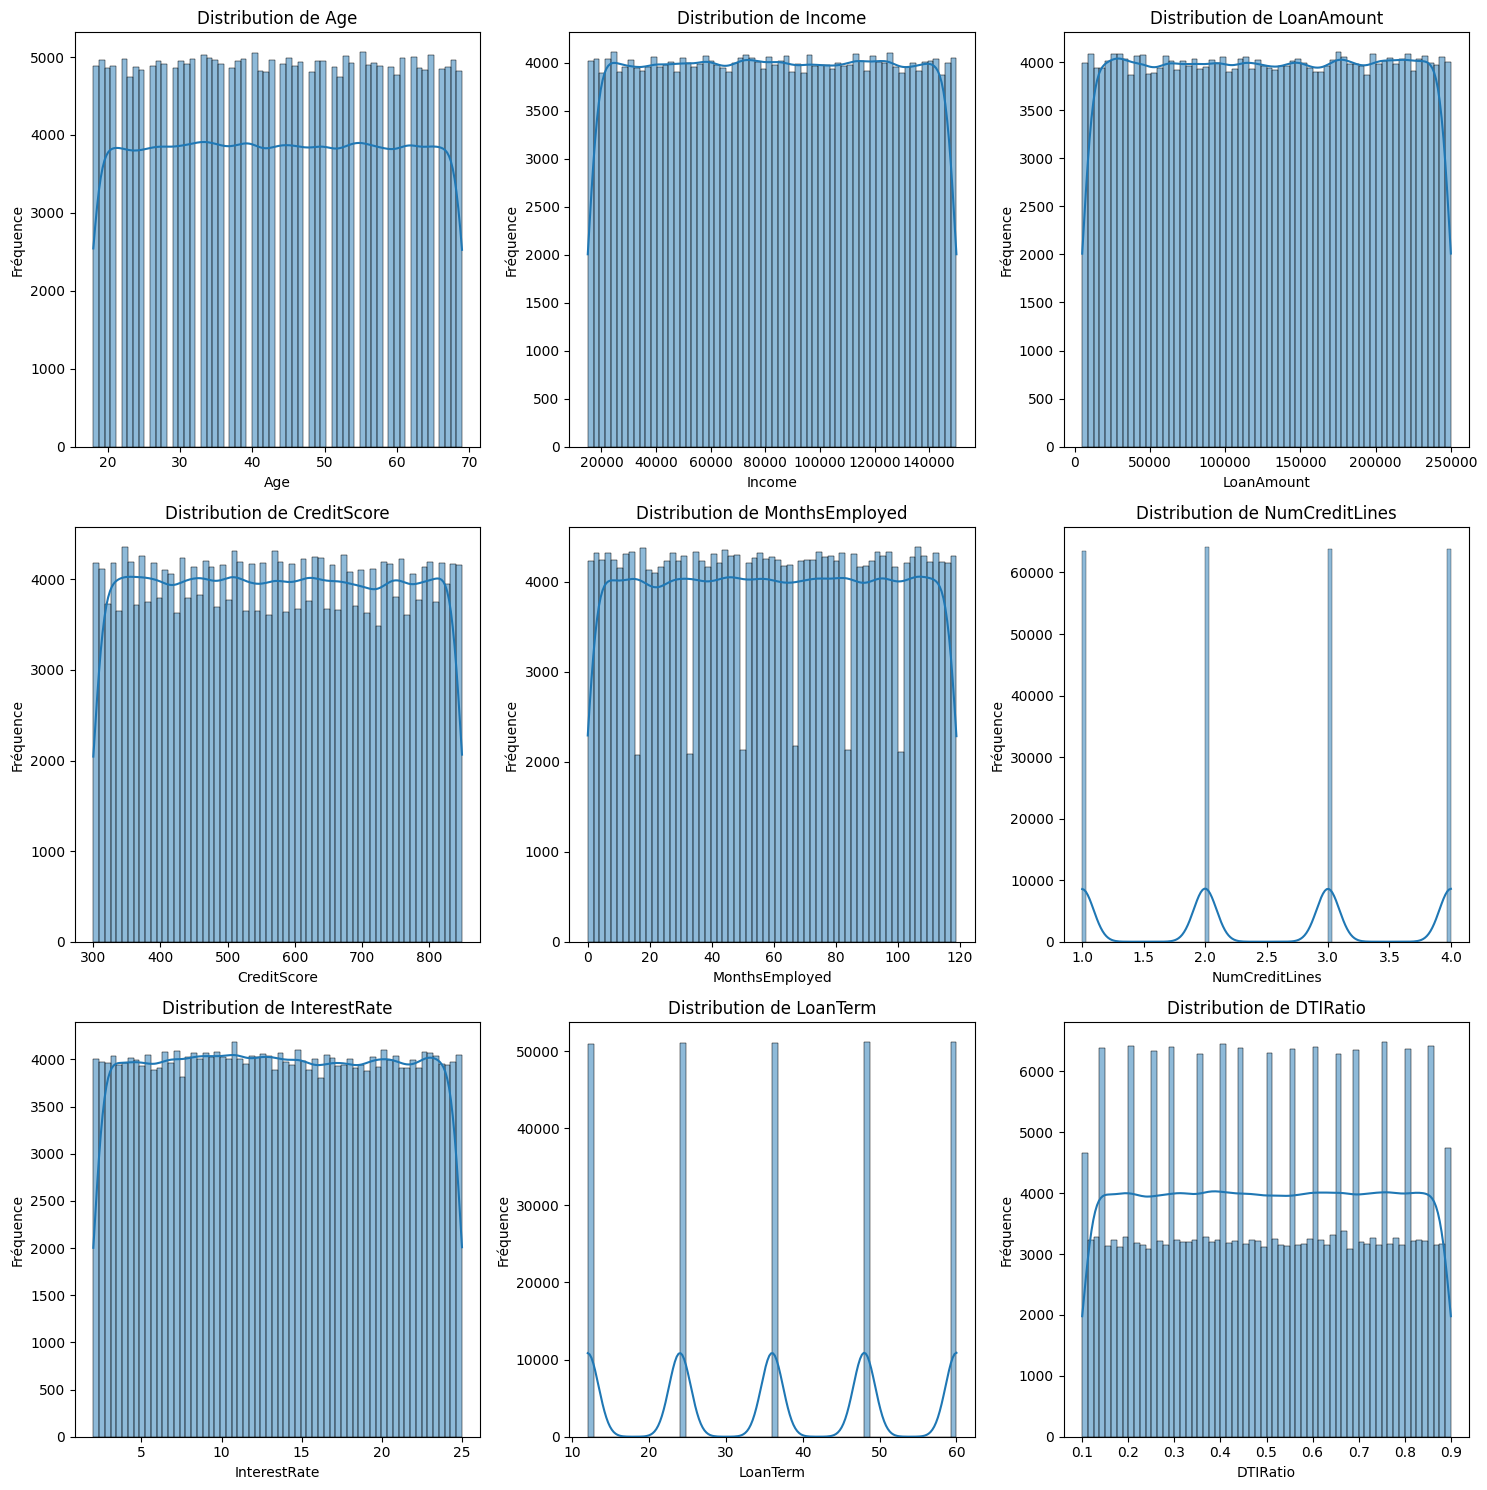

In [39]:


# création liste des variables continues
variables_continues = ['Age', 'Income', 'LoanAmount', 'CreditScore', 
                      'MonthsEmployed', 'NumCreditLines', 'InterestRate', 
                      'LoanTerm', 'DTIRatio']

# distribution des variables continues avec Subplots 
n_vars = len(variables_continues)
n_cols = 3  
n_rows = math.ceil(n_vars / n_cols)  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))

for i, variable in enumerate(variables_continues):
    row = i // n_cols
    col = i % n_cols
    sns.histplot(loan_data[variable], kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution de {variable}')
    axes[row, col].set_xlabel(variable)
    axes[row, col].set_ylabel('Fréquence')

plt.tight_layout()  
plt.show()

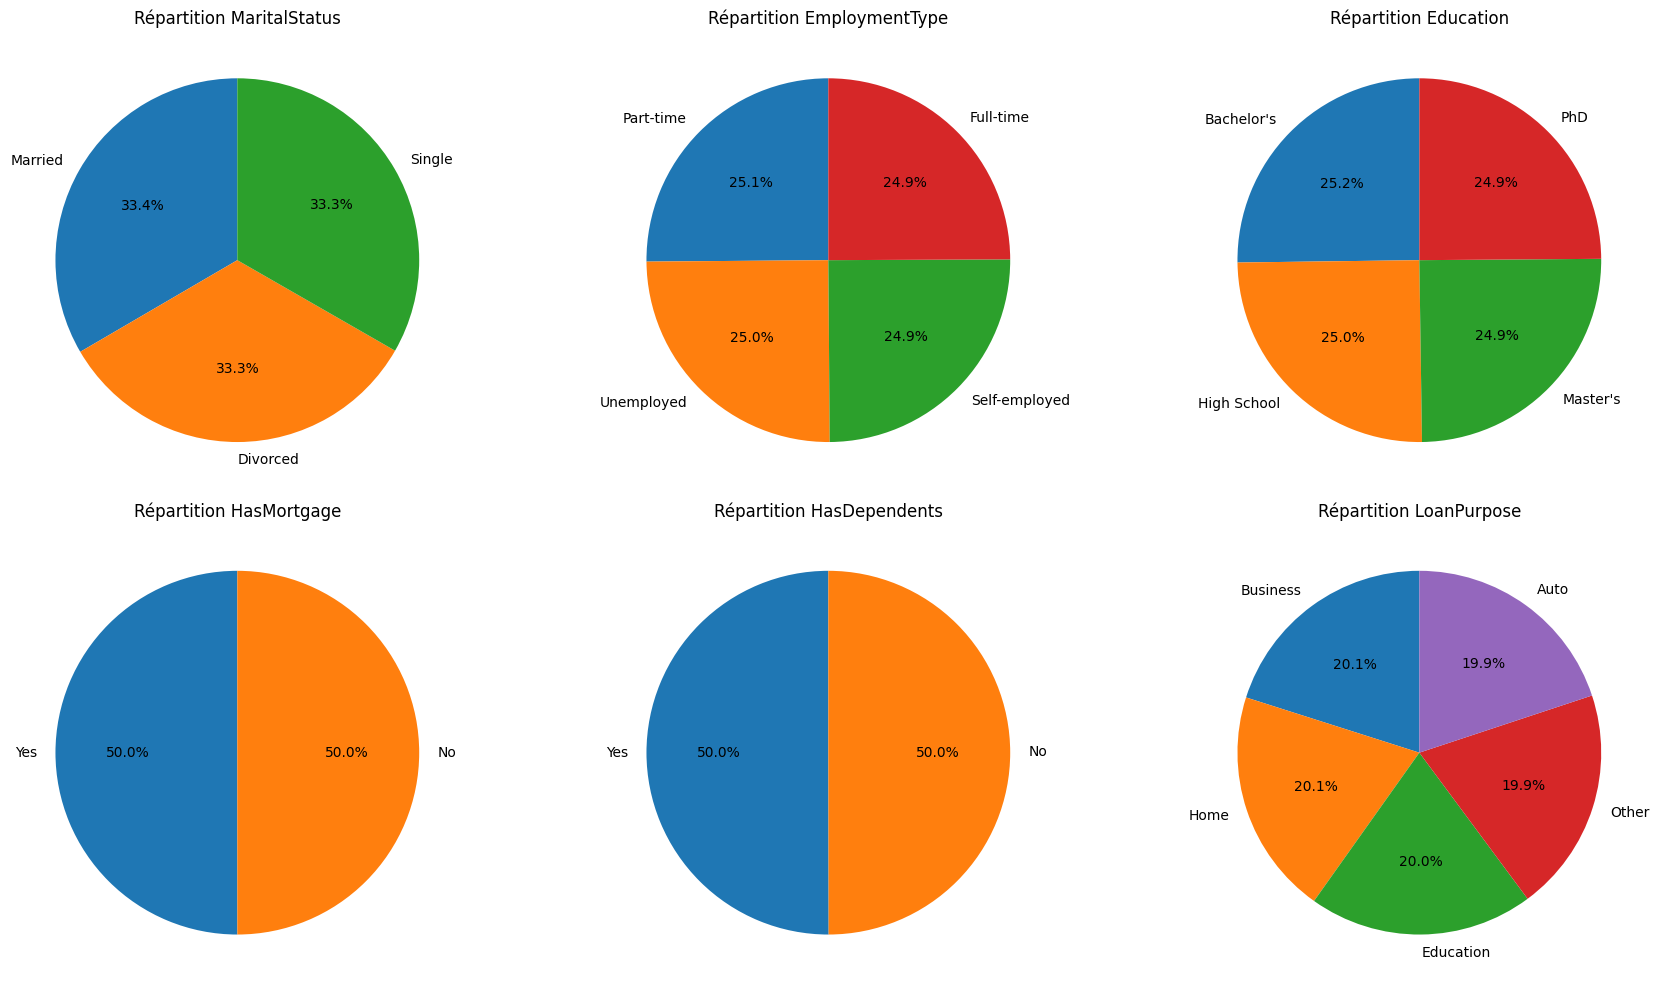

In [40]:
# Création de la figure avec 2 lignes et 6 colonnes
fig, axes = plt.subplots(2, 3, figsize=(18, 10)) 

# Liste des colonnes à afficher
columns = [
    'MaritalStatus', 'EmploymentType', 'Education', 
    'HasMortgage', 'HasDependents', 'LoanPurpose'
]

# Boucle pour créer les graphiques
for i, col in enumerate(columns):
    row = i // 3 
    col_index = i % 3 
    
    loan_data[col].value_counts().plot.pie(ax=axes[row, col_index], autopct='%1.1f%%', startangle=90)
    axes[row, col_index].set_title(f"Répartition {col}")
    axes[row, col_index].set_ylabel("")


plt.tight_layout()
plt.show()

Analyse des resultats :

On observe des distributions relativement uniformes. On voit clairement ici que ce sont des données fictives car elles sont équitablement réparties.

#### Analyse de corrélation avec la methode de Pearson

                     Age    Income  LoanAmount  CreditScore  MonthsEmployed  \
Age             1.000000 -0.001244   -0.002213    -0.000548       -0.000341   
Income         -0.001244  1.000000   -0.000865    -0.001430        0.002675   
LoanAmount     -0.002213 -0.000865    1.000000     0.001261        0.002817   
CreditScore    -0.000548 -0.001430    0.001261     1.000000        0.000613   
MonthsEmployed -0.000341  0.002675    0.002817     0.000613        1.000000   
NumCreditLines -0.000890 -0.002016    0.000794     0.000016        0.001267   
InterestRate   -0.001127 -0.002303   -0.002291     0.000436        0.000096   
LoanTerm        0.000263 -0.000998    0.002538     0.001130       -0.001166   
DTIRatio       -0.004689  0.000205    0.001122    -0.001039        0.001765   

                NumCreditLines  InterestRate  LoanTerm  DTIRatio  
Age                  -0.000890     -0.001127  0.000263 -0.004689  
Income               -0.002016     -0.002303 -0.000998  0.000205  
LoanAmou

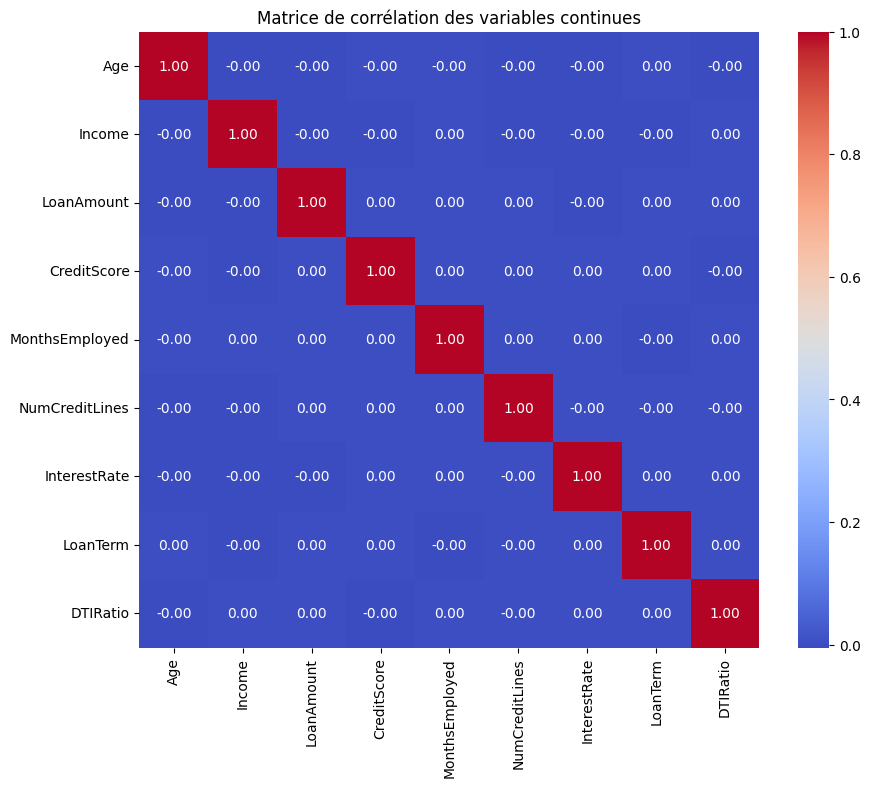

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


variables_continues = ['Age', 'Income', 'LoanAmount', 'CreditScore', 
                      'MonthsEmployed', 'NumCreditLines', 'InterestRate', 
                      'LoanTerm', 'DTIRatio']

# Calcul de la matrice de corrélation
correlation_matrix = loan_data[variables_continues].corr()

# Affichage de la matrice de corrélation
print(correlation_matrix)

# Visualisation de la matrice de corrélation avec un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation des variables continues")
plt.show()

Les coefficients de corrélation sont très proches de 0. Cela signifie qu'il n'y a pas de forte relation linéaire entre la plupart des variables.

#### Visualisation de la distribution des données avec Boxplot

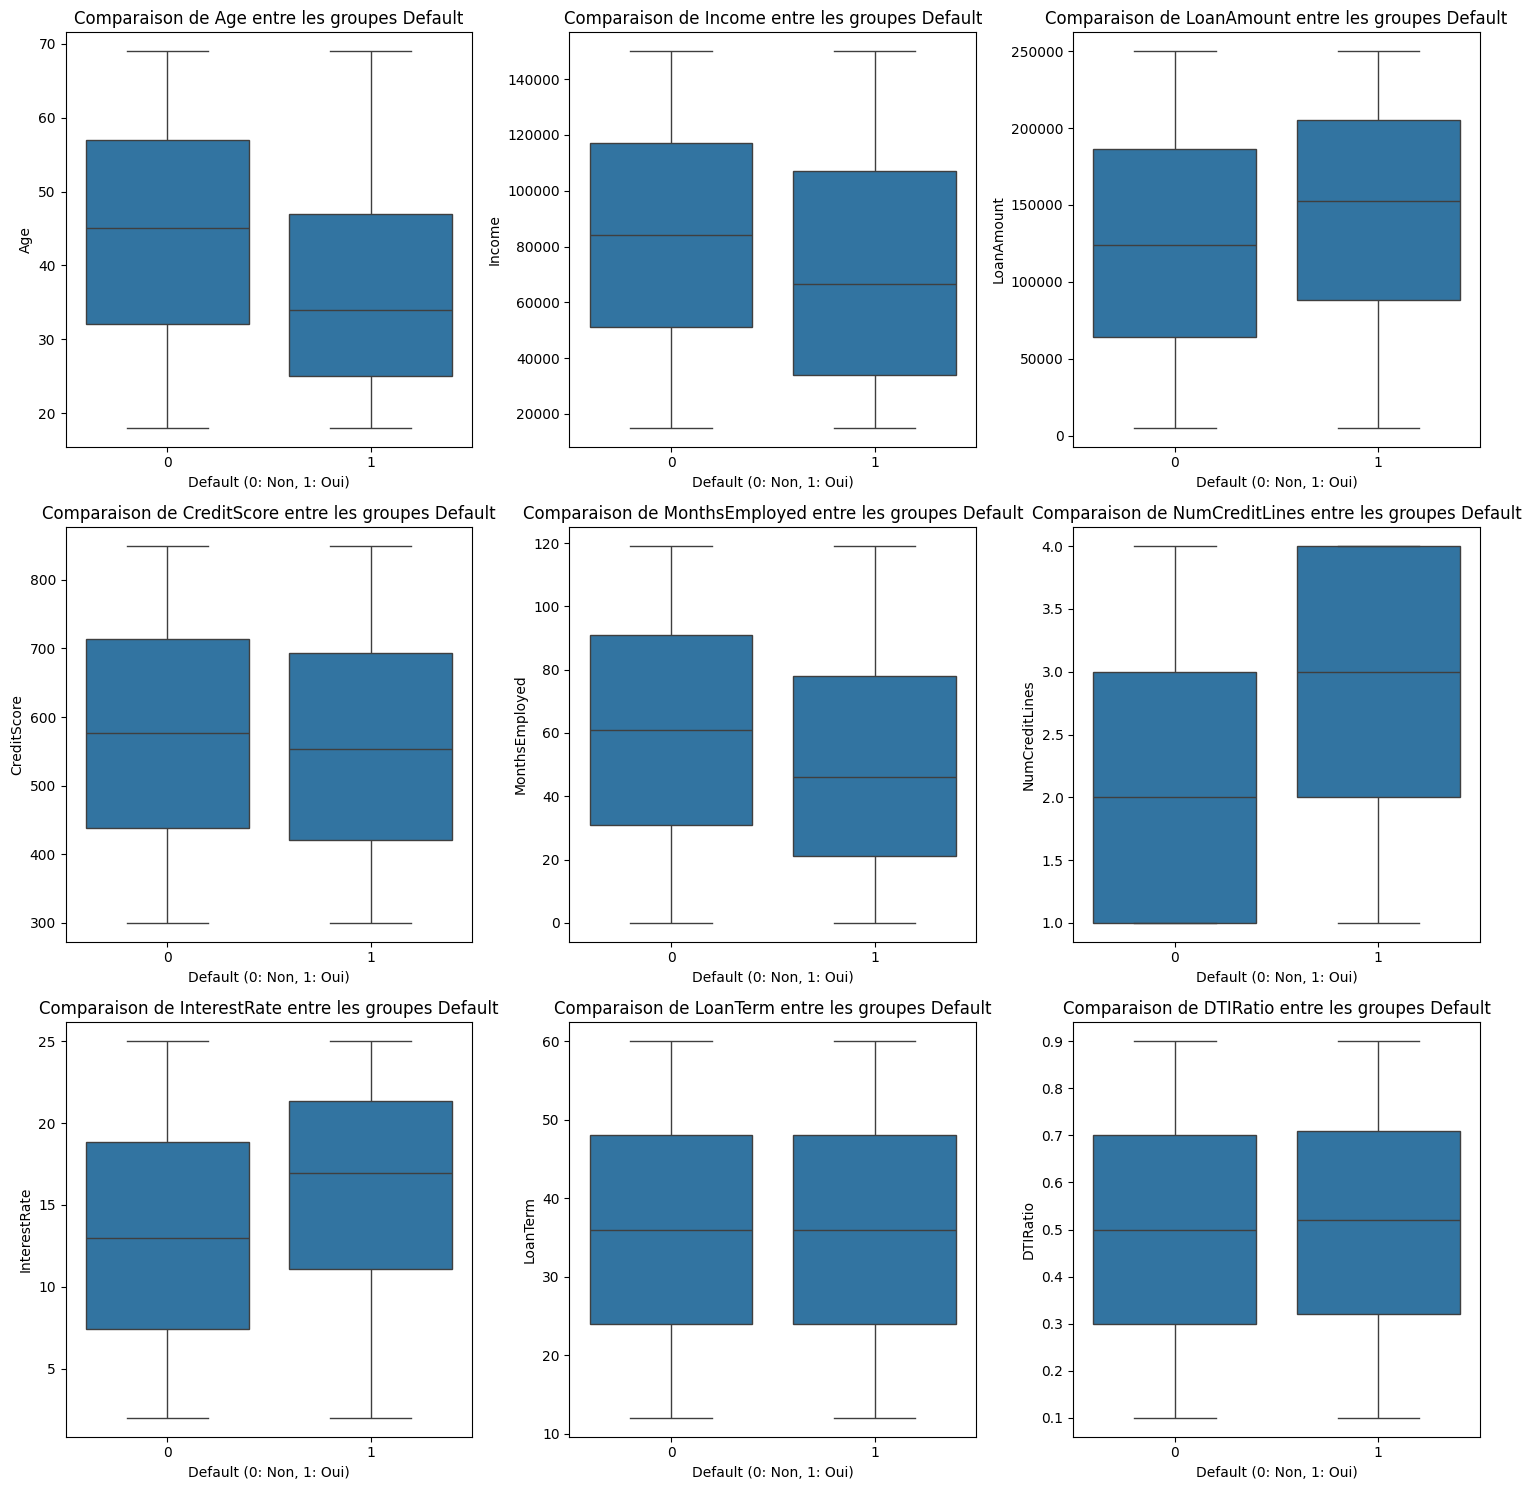

In [42]:
variables_continues = ['Age', 'Income', 'LoanAmount', 'CreditScore', 
                      'MonthsEmployed', 'NumCreditLines', 'InterestRate', 
                      'LoanTerm', 'DTIRatio']

# Calcul du nombre de lignes et de colonnes pour la grille
n_vars = len(variables_continues)
n_cols = 3
n_rows = math.ceil(n_vars / n_cols)

# Création de la grille de sous-graphiques
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows)) # Ajuster la taille si besoin

# Affichage des box plots dans les sous-graphiques
for i, variable in enumerate(variables_continues):
    row = i // n_cols
    col = i % n_cols
    sns.boxplot(x='Default', y=variable, data=loan_data, ax=axes[row, col])
    axes[row, col].set_title(f'Comparaison de {variable} entre les groupes Default')
    axes[row, col].set_xlabel('Default (0: Non, 1: Oui)')
    axes[row, col].set_ylabel(variable)

# Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()

# Affichage de la grille de sous-graphiques
plt.show()

Analyse

    Age :
        On observe une différence notable : une tendance pour les personnes plus jeunes par rapport aux personnes plus agés à être plus susceptibles de faire défaut. 

    Income (Revenu) :
        On observe une différence notable : le revenu médian des emprunteurs qui ont fait défaut est inférieur à celui des emprunteurs qui n'ont pas fait défaut. Cela suggère que le revenu est un facteur important dans le risque de crédit.

    LoanAmount (Montant du prêt) :
        On observe que ici que les montants élevés ont tendance à faire défaut.

    CreditScore (Score de crédit) :
        On observe que le score de crédit ne diffère que peu.

    MonthsEmployed (Mois d'emploi) :
        Les emprunteurs qui ont fait défaut semblent avoir une durée d'emploi légèrement inférieure. La stabilité professionnelle est donc un facteur à considérer.

    NumCreditLines (Nombre de lignes de crédit) :
        On observe ici qu'au plus la personne à déjà des crédit, au plus il y a de chance de faire défaut.

    InterestRate (Taux d'intérêt) :
        Les emprunteurs qui ont fait défaut ont un taux d'intérêt plus élevé. Cela est logique, car les prêteurs facturent des taux plus élevés aux emprunteurs considérés comme plus risqués.

    LoanTerm (Durée du prêt) :
        Pas de différence notable

    DTIRatio (Ratio dette/revenu) :
        Pas de différence notable


### Répartition des variables catégorielles


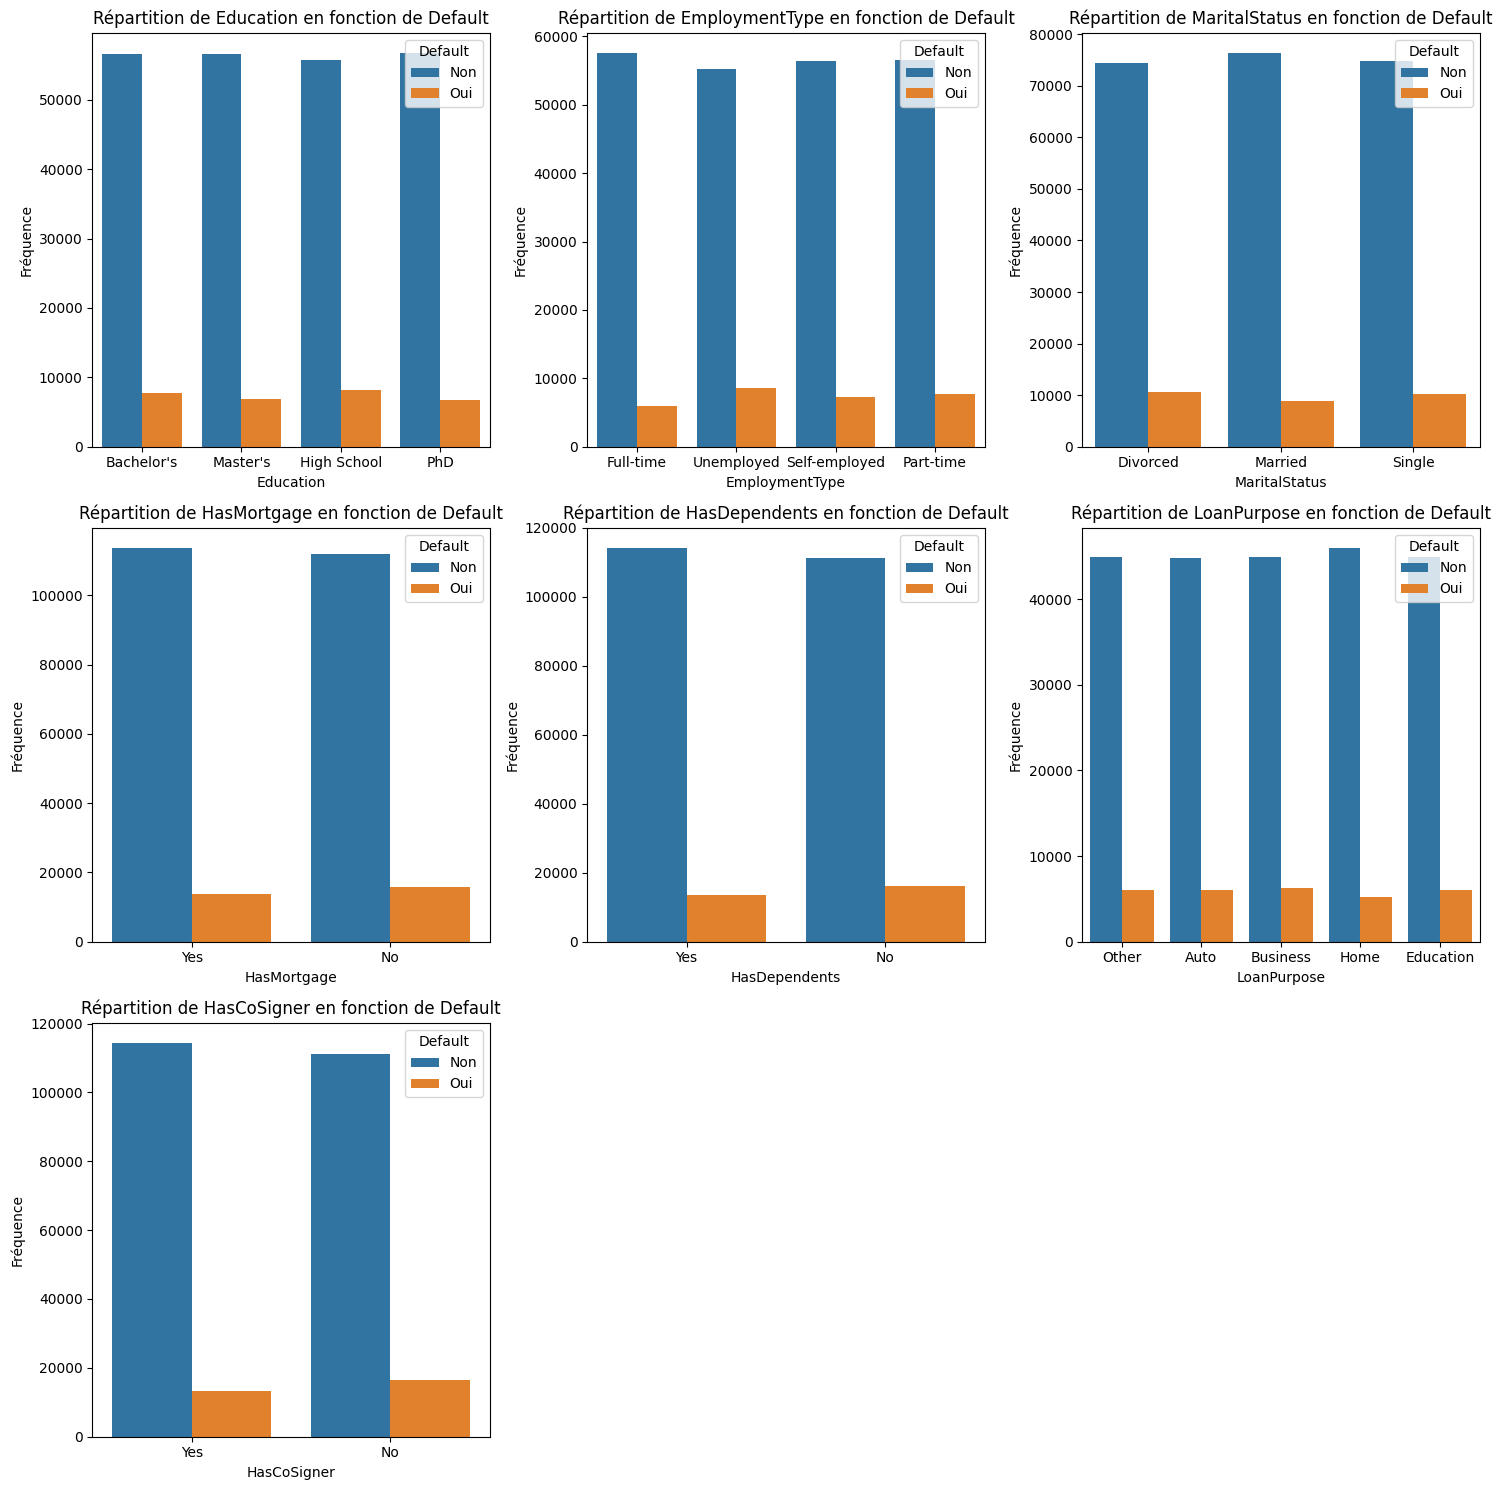

In [43]:
variables_categorielles = ['Education', 'EmploymentType', 'MaritalStatus', 
                           'HasMortgage', 'HasDependents', 'LoanPurpose', 
                           'HasCoSigner']

# Calcul du nombre de lignes et de colonnes pour la grille
n_vars = len(variables_categorielles)
n_cols = 3
n_rows = math.ceil(n_vars / n_cols)

# Création de la grille de sous-graphiques
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))

# Affichage des count plots dans les sous-graphiques
for i, variable in enumerate(variables_categorielles):
    row = i // n_cols
    col = i % n_cols
    sns.countplot(x=variable, hue='Default', data=loan_data, ax=axes[row, col])
    axes[row, col].set_title(f'Répartition de {variable} en fonction de Default')
    axes[row, col].set_xlabel(variable)
    axes[row, col].set_ylabel('Fréquence')
    axes[row, col].legend(title='Default', labels=['Non', 'Oui'])

# Suppression des sous-graphiques vides
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

# Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()

# Affichage de la grille de sous-graphiques
plt.show()

#### Test de Chi-deux

In [44]:
from scipy.stats import chi2_contingency

variables_categorielles = ['Education', 'EmploymentType', 'MaritalStatus', 
                           'HasMortgage', 'HasDependents', 'LoanPurpose', 
                           'HasCoSigner']

for variable in variables_categorielles:
    # Création du tableau de contingence
    contingency_table = pd.crosstab(loan_data[variable], loan_data['Default'])

    # Réalisation du test du chi carré
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Affichage des résultats
    print(f"Variable : {variable}")
    print(f"Chi2 : {chi2}")
    print(f"P-value : {p}")
    print("-" * 50)

Variable : Education
Chi2 : 214.01898255592704
P-value : 3.9404864175508716e-46
--------------------------------------------------
Variable : EmploymentType
Chi2 : 529.7449284156027
P-value : 1.7066378020433154e-114
--------------------------------------------------
Variable : MaritalStatus
Chi2 : 200.3611356065489
P-value : 3.105504830442356e-44
--------------------------------------------------
Variable : HasMortgage
Chi2 : 133.25200560751577
P-value : 7.96338322455275e-31
--------------------------------------------------
Variable : HasDependents
Chi2 : 306.8506093007918
P-value : 1.0600086119645882e-68
--------------------------------------------------
Variable : LoanPurpose
Chi2 : 127.93422475687699
P-value : 1.0767865809403042e-26
--------------------------------------------------
Variable : HasCoSigner
Chi2 : 390.3050463714834
P-value : 7.103434211754059e-87
--------------------------------------------------


Interprétation des résulats

Toutes les variables catégorielles testées montrent une association significative (p-value <0.05) avec le défaut de paiement. Cela signifie que ces variables peuvent être utilisées comme facteurs prédictifs dans un modèle de risque de crédit

### Répartition de la variable Default

Default
0    225694
1     29653
Name: count, dtype: int64


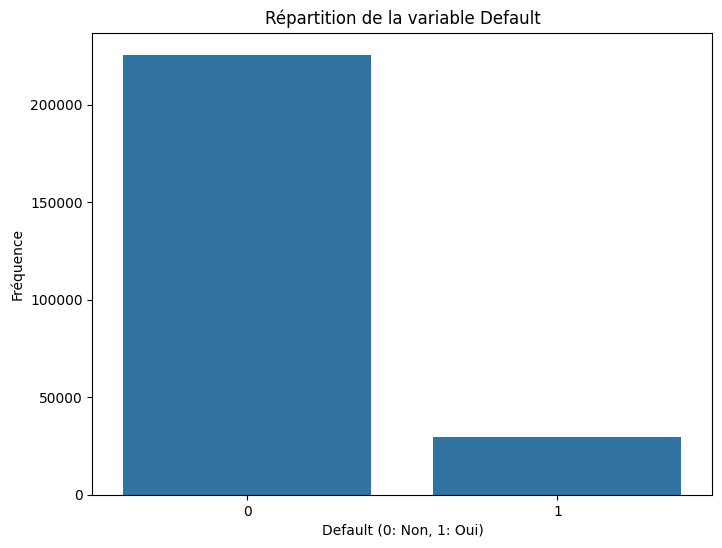

In [45]:
# Compter le nombre d'observations pour chaque classe
default_counts = loan_data['Default'].value_counts()

# Afficher les résultats
print(default_counts)

# Visualiser la répartition
plt.figure(figsize=(8, 6))
sns.countplot(x='Default', data=loan_data)
plt.title('Répartition de la variable Default')
plt.xlabel('Default (0: Non, 1: Oui)')
plt.ylabel('Fréquence')
plt.show()

Ce graphe montre le déséquilibre suivant : 

 La classe "Default = 0" (absence de défaut) est largement majoritaire par rapport à la classe "Default = 1" (défaut de paiement).

Pour le rééquilibrage nous allons partir sur la méthode SMOTE: 

Cette méthode consiste à créer de nouvelles observations synthétiques pour la classe minoritaire (Default = 1) afin d'équilibrer le nombre d'observations dans les deux classes, la méthode SMOTE se fait que sur les variables numerique

In [46]:
loan_data.drop('LoanID',axis = 1 , inplace=True)

loan_data.columns

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education',
       'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents',
       'LoanPurpose', 'HasCoSigner', 'Default'],
      dtype='object')

#### Rééquilibrage avec SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE


variables_categorielles = ['Education', 'EmploymentType', 'MaritalStatus', 
                           'HasMortgage', 'HasDependents', 'LoanPurpose', 
                           'HasCoSigner']
# encodage one-hot des variables catégorielles 
loan_data = pd.get_dummies(loan_data, columns=variables_categorielles, drop_first=True)

#Séparation des variables prédictives et de la variable cible

X = loan_data.drop('Default', axis=1)
y = loan_data['Default']
# application du smote
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

data_resampled = pd.concat([X_resampled, y_resampled], axis=1)

print(data_resampled['Default'].value_counts())

Default
0    225694
1    225694
Name: count, dtype: int64


## Partie 2 : Application des modèles

### Train test split

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

#Séparer les données en features (X) et target (y)
X = data_resampled.drop('Default', axis=1)
y = data_resampled['Default']

#Diviser les données en train et test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Taille de l'ensemble d'entraînement :", len(X_train))
print("Taille de l'ensemble de test :", len(X_test))

Taille de l'ensemble d'entraînement : 361110
Taille de l'ensemble de test : 90278


Choix des modèles : 

- Arbre de décision (DecisionTreeClassifier) pour l'interprétabilité.

- Random Forest (RandomForestClassifier) pour la robustesse.

- XGBoost (XGBClassifier) pour la performance.

- Validation croisée (cross_val_score()) pour évaluer la stabilité du modèle

### DecisionTreeClassifier

In [49]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialisation du modèle
tree = DecisionTreeClassifier(random_state=42)

# Validation croisée
scores = cross_val_score(tree, X_train, y_train, cv=5, scoring='accuracy')
print("Arbre de décision :")
print(f"  Validation croisée : {scores}")
print(f"  Moyenne : {scores.mean()}")

# Entraînement du modèle
tree.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = tree.predict(X_test)

# Évaluation des performances
accuracy = accuracy_score(y_test, y_pred)
print(f"  Accuracy sur l'ensemble de test : {accuracy}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("-" * 50)

Arbre de décision :
  Validation croisée : [0.84442414 0.84352413 0.84269336 0.8429149  0.84450721]
  Moyenne : 0.8436127495776911
  Accuracy sur l'ensemble de test : 0.8490329869957243
              precision    recall  f1-score   support

           0       0.86      0.83      0.85     45127
           1       0.84      0.86      0.85     45151

    accuracy                           0.85     90278
   macro avg       0.85      0.85      0.85     90278
weighted avg       0.85      0.85      0.85     90278

[[37642  7485]
 [ 6144 39007]]
--------------------------------------------------


### RandomForestClassifier

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialisation du modèle
forest = RandomForestClassifier(random_state=42)

# Validation croisée
scores = cross_val_score(forest, X_train, y_train, cv=5, scoring='accuracy')
print("Random Forest:")
print(f"  Validation croisée : {scores}")
print(f"  Moyenne : {scores.mean()}")

# Entraînement du modèle
forest.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = forest.predict(X_test)

# Évaluation des performances
accuracy = accuracy_score(y_test, y_pred)
print(f"  Accuracy sur l'ensemble de test : {accuracy}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("-" * 50)

randon forest:
  Validation croisée : [0.91419512 0.91488743 0.91339204 0.91420897 0.91386281]
  Moyenne : 0.9141092741823821
  Accuracy sur l'ensemble de test : 0.9171005117525864
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     45127
           1       0.97      0.86      0.91     45151

    accuracy                           0.92     90278
   macro avg       0.92      0.92      0.92     90278
weighted avg       0.92      0.92      0.92     90278

[[43801  1326]
 [ 6158 38993]]
--------------------------------------------------


### XGBClassifier

In [51]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialisation du modèle
xgboost = XGBClassifier(random_state=42)

# Validation croisée
scores = cross_val_score(xgboost, X_train, y_train, cv=5, scoring='accuracy')
print("XGBoost :")
print(f"  Validation croisée : {scores}")
print(f"  Moyenne : {scores.mean()}")

# Entraînement du modèle
xgboost.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = xgboost.predict(X_test)

# Évaluation des performances
accuracy = accuracy_score(y_test, y_pred)
print(f"  Accuracy sur l'ensemble de test : {accuracy}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("-" * 50)

XGBoost :
  Validation croisée : [0.92165822 0.92294592 0.92167207 0.91988591 0.92243361]
  Moyenne : 0.9217191437512116
  Accuracy sur l'ensemble de test : 0.9217195773056559
              precision    recall  f1-score   support

           0       0.87      0.99      0.93     45127
           1       0.98      0.86      0.92     45151

    accuracy                           0.92     90278
   macro avg       0.93      0.92      0.92     90278
weighted avg       0.93      0.92      0.92     90278

[[44488   639]
 [ 6428 38723]]
--------------------------------------------------


## Partie 3 : Performance des modèles

Évaluation des performances de nos modèles 

1- Calculer Accuracy(le pourcentage de predictions correctes ), Precision(Proportion de vrais positifs parmi les prédictions positives.), Recall(Proportion de vrais positifs parmi les observations réelles positives.), F1-score(Moyenne harmonique de la précision et du rappel).

2- Tracer une matrice de confusion (confusion_matrix + sns.heatmap) (Matrice de confusion : Tableau qui visualise le nombre de prédictions correctes et incorrectes pour chaque classe).

3-Tracer la courbe ROC-AUC (roc_curve, auc)(Courbe qui représente la performance d'un classificateur binaire à différents seuils de classification. L'AUC (Area Under the Curve) est une mesure de la capacité du classificateur à distinguer les classes.).


### DecisionTreeClassifier

Arbre de décision :
  Accuracy : 0.8490329869957243
  Precision : 0.839004559924288
  Recall : 0.86392327966158
  F1-score : 0.8512816036140239


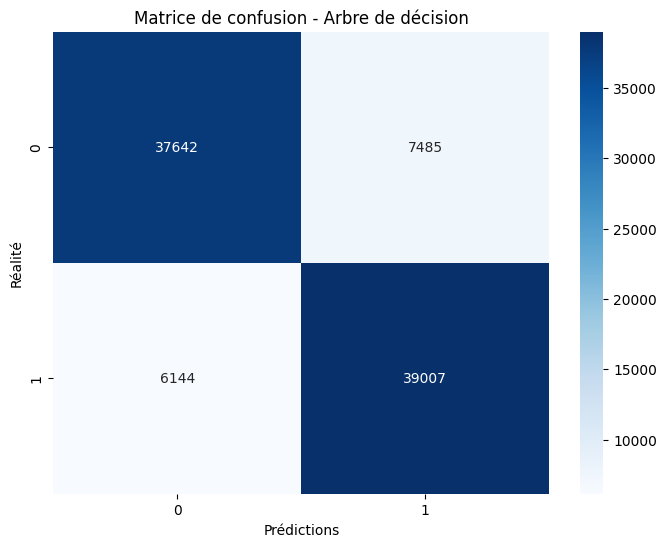

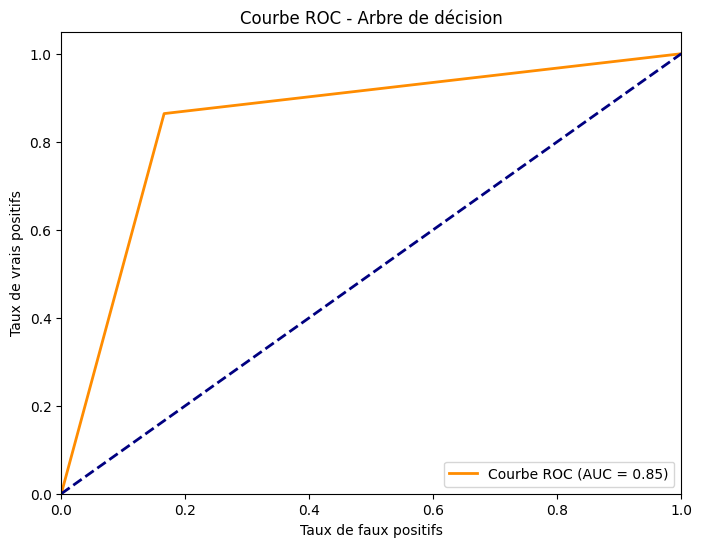

--------------------------------------------------


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

# Prédictions sur l'ensemble de test
y_pred = tree.predict(X_test)

# Calcul des métriques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Arbre de décision :")
print(f"  Accuracy : {accuracy}")
print(f"  Precision : {precision}")
print(f"  Recall : {recall}")
print(f"  F1-score : {f1}")

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  
plt.title('Matrice de confusion - Arbre de décision')
plt.xlabel('Prédictions')  
plt.ylabel('Réalité')    
plt.show()

# Courbe ROC-AUC
y_prob = tree.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC - Arbre de décision')
plt.legend(loc="lower right")
plt.show()

print("-" * 50)

### Random Forest

Forêt aléatoire :
  Accuracy : 0.9171005117525864
  Precision : 0.9671122795704259
  Recall : 0.8636132090097672
  F1-score : 0.9124371124371125


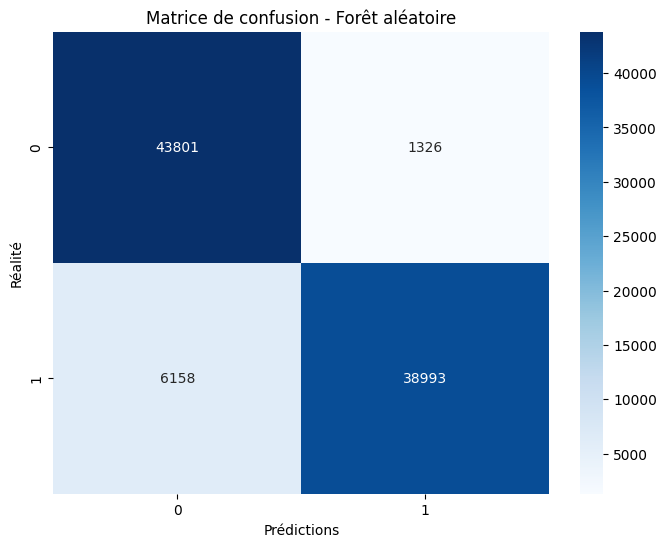

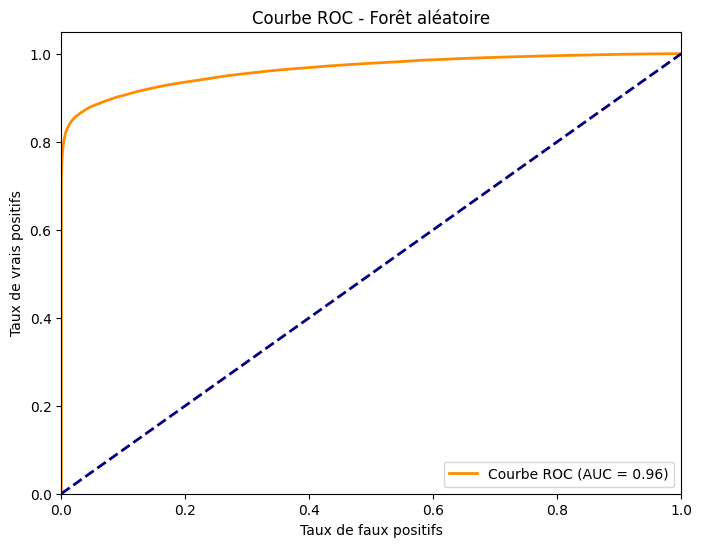

--------------------------------------------------


In [ ]:
# Prédictions sur l'ensemble de test
y_pred = forest.predict(X_test)

# Calcul des métriques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Forêt aléatoire :")
print(f"  Accuracy : {accuracy}")
print(f"  Precision : {precision}")
print(f"  Recall : {recall}")
print(f"  F1-score : {f1}")

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  
plt.title('Matrice de confusion - Forêt aléatoire')
plt.xlabel('Prédictions')  
plt.ylabel('Réalité')    
plt.show()

# Courbe ROC-AUC
y_prob = forest.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC - Forêt aléatoire')
plt.legend(loc="lower right")
plt.show()

print("-" * 50)

### XGBoost

XGBoost :
  Accuracy : 0.9217195773056559
  Precision : 0.9837660687973172
  Recall : 0.8576332750105202
  F1-score : 0.9163797285624696


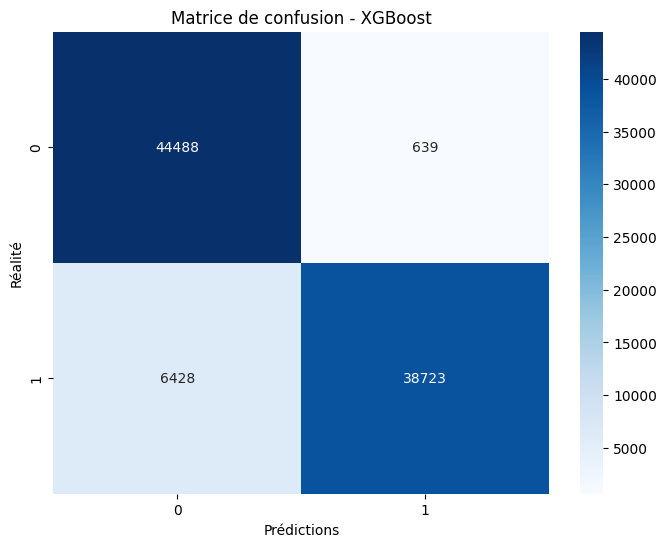

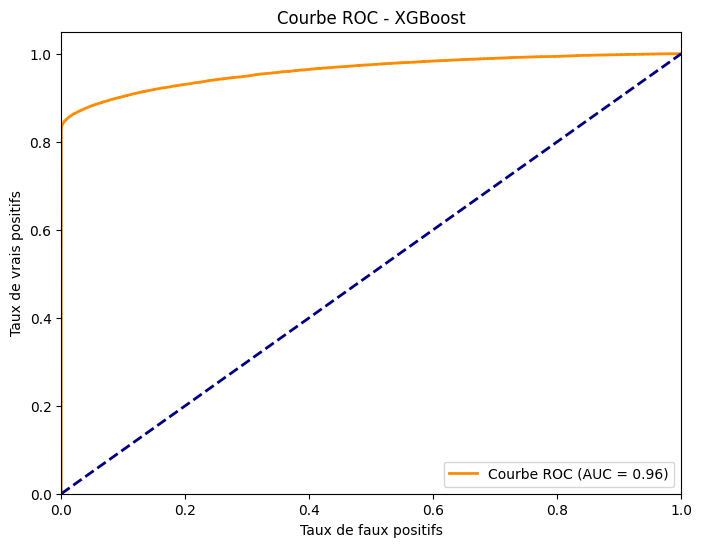

--------------------------------------------------


In [ ]:
# Prédictions sur l'ensemble de test
y_pred = xgboost.predict(X_test)

# Calcul des métriques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("XGBoost :")
print(f"  Accuracy : {accuracy}")
print(f"  Precision : {precision}")
print(f"  Recall : {recall}")
print(f"  F1-score : {f1}")

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  
plt.title('Matrice de confusion - XGBoost')
plt.xlabel('Prédictions')  
plt.ylabel('Réalité')    
plt.show()

# Courbe ROC-AUC
y_prob = xgboost.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC - XGBoost')
plt.legend(loc="lower right")
plt.show()

print("-" * 50)

# Partie 4 :  Interpretability & Explicability with SHAP

## RandomForest model

In [ ]:

explainer = shap.TreeExplainer(forest)
shap_values = explainer.shap_values(X_train)
# Plot SHAP summary plot
shap.summary_plot(shap_values, X_train)

In [ ]:
explainer = shap.Explainer(forest, X_train)
shap_values = explainer(X_test)
shap.initjs()
shap.force_plot(explainer.expected_value, 
                shap_values[0].values,
                X_test.iloc[0])

## DecisionTree model

In [ ]:
explainer = shap.TreeExplainer(tree)
shap_values = explainer.shap_values(X_train)
# Plot SHAP summary plot
shap.summary_plot(shap_values, X_train)

In [ ]:
explainer = shap.Explainer(tree, X_train)
shap_values = explainer(X_test)
shap.initjs()
shap.force_plot(explainer.expected_value, 
                shap_values[0].values,
                X_test.iloc[0])

## XGBoost model

In [ ]:
explainer = shap.TreeExplainer(xgboost)
shap_values = explainer.shap_values(X_train)
# Plot SHAP summary plot
shap.summary_plot(shap_values, X_train)

In [ ]:
explainer = shap.Explainer(xgboost, X_train)
shap_values = explainer(X_test)
shap.initjs()
shap.force_plot(explainer.expected_value, 
                shap_values[0].values,
                X_test.iloc[0])